# 투빅스 16기 정규세션 Week1 EDA - 16기 ㅇㅇㅇ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

C:\ana3\envs\t_f2.2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data Set Description

a dataset of IBM employee attrition data. Each row is personal and attrition information of an employee. 



1.   Attrition: Whether employees are still with the company or whether they’ve gone to work somewhere else. **이직여부**
2. Age: 18 to 60 years old **나이** 
3. Gender: Female or Male **성별**
4. Department: Research & Development, Sales, Human Resources. **부서**
5. BusinessTravel: Travel_Rarely, Travel_Frequently, Non-Travel. **출장빈도**
6. DistanceFromHome: Distance between the company and their home in miles. **출퇴근거리**
7. MonthlyIncome: Employees' numeric monthly income. **월수입**
8. MaritalStatus: Married, Single, Divorced. **결혼 여부**
9. Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'. **교육**
10. EducationField: Life Sciences， Medical， Marketing，Technical Degree，Other. **분야 (교육)**
11. EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. **환경 만족도**
12. RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. **관계 만족도**
13. JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. 
14. JobRole: Sales Executive，Research Science, Laboratory Tec, Manufacturing, Healthcare Rep, etc **직무 역할**
15. JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. **직무 만족도**
16. OverTime: Whether they work overtime or not. **야근(초과근무)**
17. NumCompaniesWorked: Number of companies they worked for before joinging IBM. **IBM 재직 전 근무한 기업 수**
18. PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'. **성능 평가**
19. YearsAtCompany: Years they worked for IBM. **IBM 재직 년수**
20. WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. **워라밸**
21. YearsSinceLastPromotion: Years passed since their last promotion.**마지막으로 승진한 후로부터 몇 년이 지났는지**




### Data Loading

In [2]:
data = pd.read_csv("assignment_data.csv", encoding="UTF8")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 모든 column에 1470개의 데이터가 들어있어, 결측치는 없다.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
pd.set_option('display.max_columns',40)
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Numerical feature: 
Age, DistanceFromHome, EmployeeCount, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

#### Categorical feature:
Attrition(Target Variable), BusinessTravel, Department, Education, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, Over18, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance

#### Useless feature: 
EmployeeNumber  -> id index로 사용

In [6]:
len(data.columns)

35

In [7]:
numerical_feature = ['EmployeeNumber','Age','DailyRate', 'DistanceFromHome', 'EmployeeCount', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
len(numerical_feature)

18

In [8]:
categorical_feature = ['EmployeeNumber','Attrition', 'BusinessTravel', 'Department', 'OverTime','Education','EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
len(categorical_feature)

18

In [9]:
category_data = data[categorical_feature]
category_data.set_index('EmployeeNumber',inplace=True)
category_data.head()

,Attrition,BusinessTravel,Department,OverTime,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
EmployeeNumber,,,,,,,,,,,,,,,,,
1,Yes,Travel_Rarely,Sales,Yes,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,Y,3,1,1
2,No,Travel_Frequently,Research & Development,No,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,Y,4,4,3
4,Yes,Travel_Rarely,Research & Development,Yes,2,Other,4,Male,2,1,Laboratory Technician,3,Single,Y,3,2,3
5,No,Travel_Frequently,Research & Development,Yes,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,Y,3,3,3
7,No,Travel_Rarely,Research & Development,No,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,Y,3,4,3


In [10]:
numerical_data = data[numerical_feature]
numerical_data.set_index('EmployeeNumber',inplace=True)
numerical_data.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,
1,41,1102,1,1,94,5993,19479,8,11,80,0,8,0,6,4,0,5
2,49,279,8,1,61,5130,24907,1,23,80,1,10,3,10,7,1,7
4,37,1373,2,1,92,2090,2396,6,15,80,0,7,3,0,0,0,0
5,33,1392,3,1,56,2909,23159,1,11,80,0,8,3,8,7,3,0
7,27,591,2,1,40,3468,16632,9,12,80,1,6,3,2,2,2,2


### Data outlier detection (numerical data)
#### Interquartile Range Q3-Q1를 활용해 Box Plot을 사용하여 이상치제거 실시

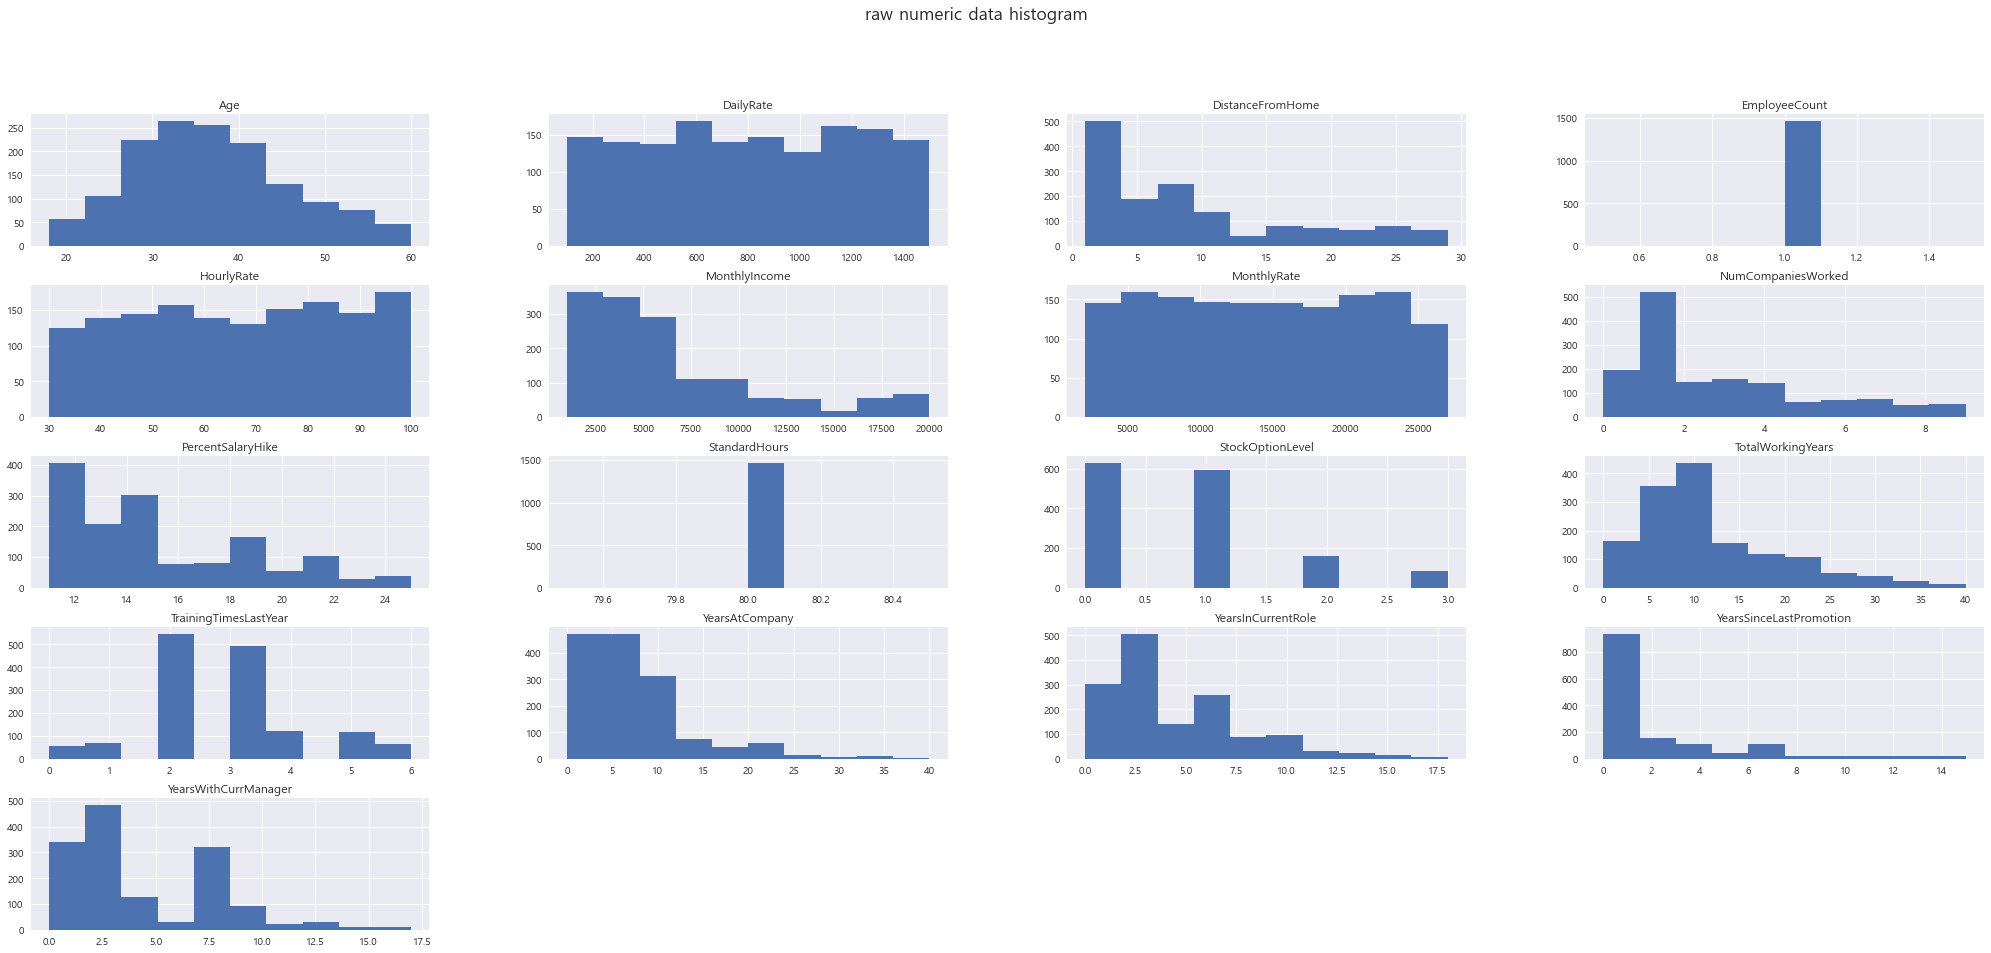

In [11]:
numerical_data.hist(figsize=(35,15))
plt.suptitle('raw numeric data histogram',size='xx-large')
plt.show()

In [12]:
def outlier_detect(data, column):
    # data: sample data that we want to detect outliers
    # column: specific feature that we want to detect outliers
    w = 1.6
    quan_25 = np.percentile(data[column].values, 25)
    quan_75 = np.percentile(data[column].values, 75)
    
    # calculate interquartile range
    IQR = quan_75 - quan_25
    
    min_ = quan_25 - IQR*w
    max_ = quan_75 + IQR*w
    
    outlier_idx = data[column][ (data[column] < min_) | (data[column] > max_) ].index
    return outlier_idx

In [13]:
outlier_idx = []
index_ = []

for feature_ in numerical_data.columns:
    idx_ = outlier_detect(numerical_data.astype('float'),feature_)
    outlier_idx.append(idx_) # 중복으로 겹치는 행이 있을수 있어서 리스트 꼴에 저장후 unique만 추출

for list_ in outlier_idx:
    for _ in list_:
        index_.append(_)
remove_duplicated_index = np.unique(np.array(index_))
numerical_data = numerical_data.drop(remove_duplicated_index,axis=0)

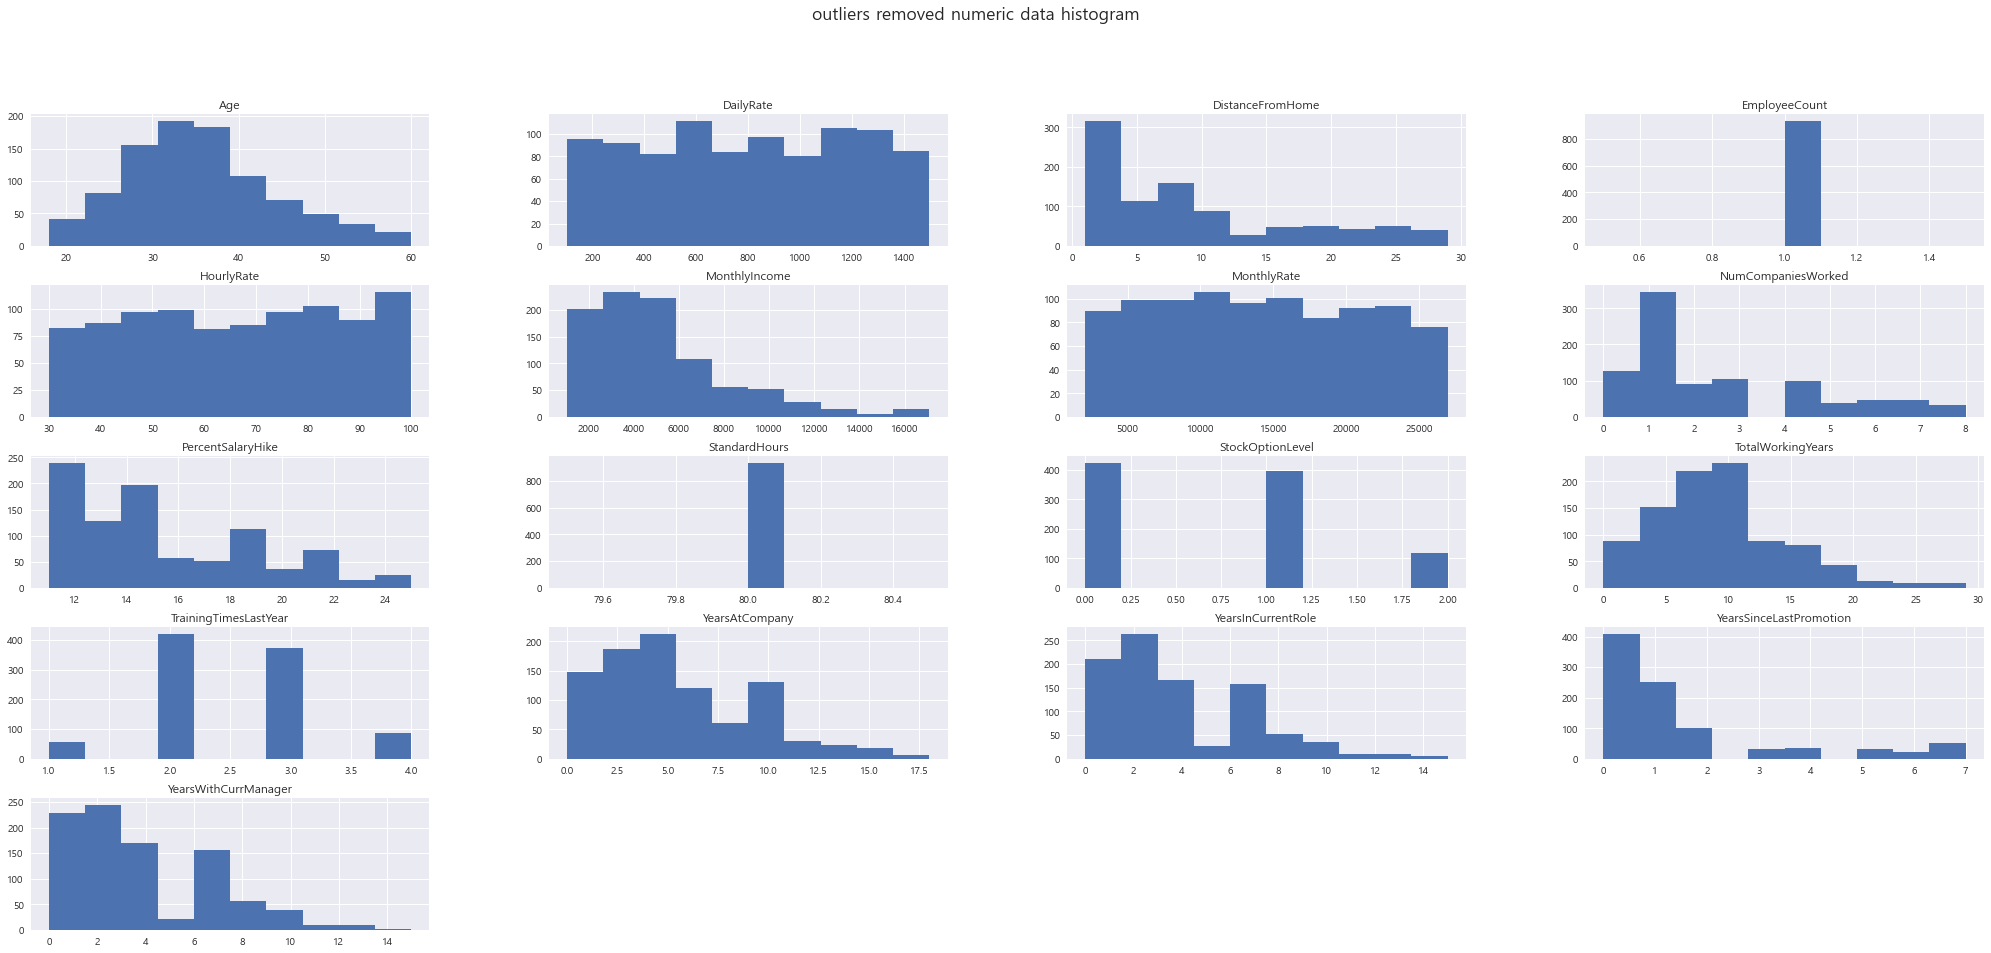

In [14]:
numerical_data.hist(figsize=(35,15))
plt.suptitle('outliers removed numeric data histogram',size='xx-large')
plt.show()

#### skewnewss를 활용하여 log transformation이 필요한 feature 추출후 실행

통상적으로

|skewnewss| > 1 이면, 상당히 치우쳐져있음

kurtosis > 3이면, 분포가 길고 꼬리가 두꺼움

In [15]:
from scipy.stats import skew,kurtosis

skew_needed = []
kurtosis_needed = []

for col in numerical_data:
    skew_ = numerical_data[col].skew()
    kurtosis_ = numerical_data[col].kurtosis()
    print(col, 'skew:',skew_,
          'kurtosis:',kurtosis_)
    if abs(skew_) > 1:
        skew_needed.append(col)
    else:
        continue
        
    if kurtosis_ > 3:
        kurtosis_needed.append(col)
    else:
        continue
print('\n')
print('skew needed:',skew_needed)
print('kurtosis needed:',kurtosis_needed)

Age skew: 0.5539310150154669 kurtosis: -0.027397639195236412
DailyRate skew: -0.00673824445438629 kurtosis: -1.2003881508456868
DistanceFromHome skew: 0.9137745638955675 kurtosis: -0.31926000265074084
EmployeeCount skew: 0 kurtosis: 0
HourlyRate skew: -0.0340314873613978 kurtosis: -1.2087942871933004
MonthlyIncome skew: 1.4574822833189265 kurtosis: 2.19697625097433
MonthlyRate skew: 0.06648988444372418 kurtosis: -1.1529239957824458
NumCompaniesWorked skew: 0.9733344766649523 kurtosis: -0.07841316191226033
PercentSalaryHike skew: 0.7545948651646749 kurtosis: -0.3989308377059455
StandardHours skew: 0 kurtosis: 0
StockOptionLevel skew: 0.5268622844753973 kurtosis: -0.8110207547252894
TotalWorkingYears skew: 0.8817071053207226 kurtosis: 0.9501057633657712
TrainingTimesLastYear skew: 0.1573191622763539 kurtosis: -0.3344887918288464
YearsAtCompany skew: 0.7304150299041012 kurtosis: 0.12597658255602662
YearsInCurrentRole skew: 0.8354686887506438 kurtosis: 0.05657328264415096
YearsSinceLastPro

#### 큰 kurtosis로 인해 조정이 필요한 변수는 x
#### skewness로 인해 조정이 필요한 변수는 MonthlyIncome, YearsSinceLastPromotion

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

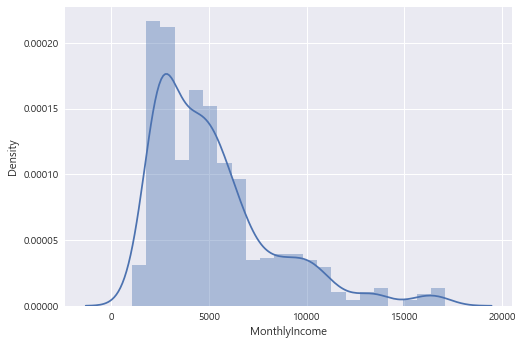

In [16]:
sns.distplot(numerical_data['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

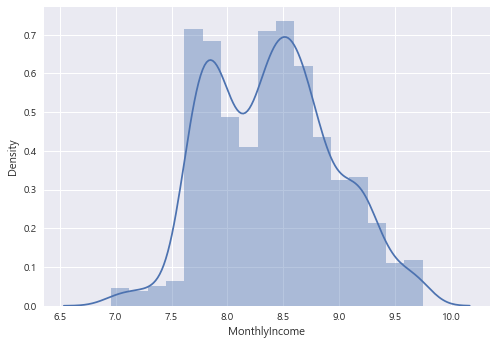

In [17]:
numerical_data['MonthlyIncome'] = np.log1p(numerical_data['MonthlyIncome'])
sns.distplot(numerical_data['MonthlyIncome'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

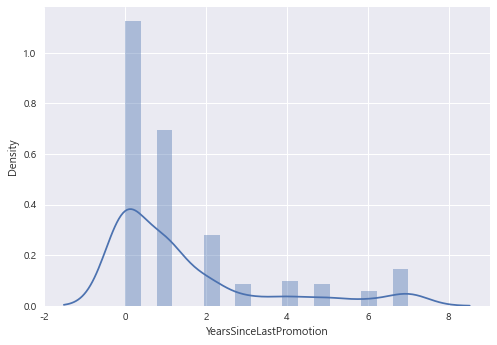

In [18]:
sns.distplot(numerical_data['YearsSinceLastPromotion'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

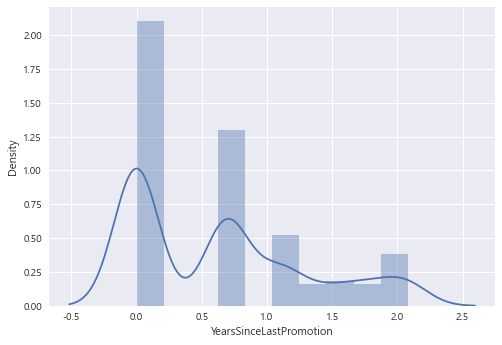

In [19]:
numerical_data['YearsSinceLastPromotion'] = np.log1p(numerical_data['YearsSinceLastPromotion'])
sns.distplot(numerical_data['YearsSinceLastPromotion'])

#### EmployeeCount와 StandardHours는 항상 고정된 값을 갖고 있으므로 삭제

In [20]:
for col in numerical_data.columns:
    category_ = np.unique(np.array(numerical_data[col]))
    print(col, category_)

Age [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
DailyRate [ 103  104  106  107  109  111  115  116  117  118  120  121  124  129
  130  131  132  134  135  138  141  144  145  146  147  148  150  152
  153  154  157  160  161  163  167  168  170  172  174  176  177  179
  180  182  185  188  192  193  194  195  196  200  201  202  204  205
  207  211  213  216  217  218  219  224  228  230  231  232  234  238
  240  241  243  248  249  251  252  253  254  258  261  265  266  267
  269  271  279  280  285  287  289  290  294  296  299  300  301  303
  304  305  306  307  309  310  311  313  316  317  318  319  322  325
  326  328  329  330  332  334  335  336  337  342  343  345  346  350
  352  355  359  360  362  363  364  365  367  369  370  371  373  374
  377  379  381  383  384  390  391  395  397  401  404  405  408  410
  413  414  419  422  426  427  428  430  431  432  433  436  438  440
  

In [21]:
numerical_data.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

### Correlation Heatmap
    Age, MonthlyIncome: 0.36   (약)
    Age, NumCompaniesWorked: 0.32   (약)
    Age, TotalWorkingYears: 0.58   (중)

    MonthlyIncome, TotalWorkingYears: 0.62   (중)
    MonthlyIncome, YearsAtCompany: 0.37   (약)
    MonthlyIncome, YearsInCurrentRole: 0.34   (약)
    MonthlyIncome, YearsWithCurrManager: 0.31   (약)

    NumCompaniesWorked, TotalWorkingYears: 0.33   (약)

    TotalWorkingYears, YearsAtCompany: 0.44   (중)
    TotalWorkingYears, YearsInCurrentRole: 0.39   (약)
    TotalWorkingYears, YearsWithCurrManager: 0.37   (약)

    YearsAtCompany, YearsInCurrentRole: 0.86   (강)
    YearsAtCompany, YearsSinceLastPromotion: 0.44   (중)
    YearsAtCompany, YearsWithCurrM: 0.85   (강)

    YearsInCurrentRole, YearsSinceLastPromotion: 0.45   (중)
    YearsInCurrentRole, YearsWithCurrM: 0.73   (강)

    YearsSinceLastPromotion, YearsWithCurrM: 0.41   (중)

<AxesSubplot:>

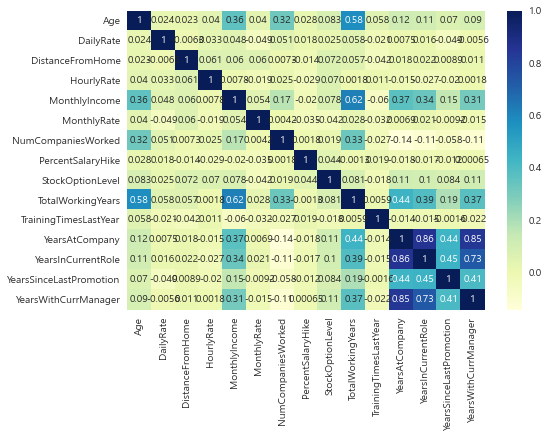

In [22]:
sns.heatmap(numerical_data.corr(),cmap = 'YlGnBu', annot=True)

YearsAtCompany, YearsInCurrentRole,YearsWithCurrM 변수 3개가 서로 상관관계가 높기 때문에 하나의 변수로 합침

In [23]:
numerical_data['YearsCompany'] = (numerical_data['YearsAtCompany'] + numerical_data['YearsInCurrentRole'] + numerical_data['YearsWithCurrManager'])/3
numerical_data.drop(['YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace=True)

### Data outlier detection (categorical data)

#### Categorical 변수 내에서는 주어진 라벨 외의 다른 값은 없다. (정상)
#### Over18 변수는 전체가 Y값이기 때문에 분석에 필요 없음 -> 삭제


In [24]:
for col in category_data.columns:
    category_ = np.unique(np.array(category_data[col]))
    print(col, category_)

Attrition ['No' 'Yes']
BusinessTravel ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
Department ['Human Resources' 'Research & Development' 'Sales']
OverTime ['No' 'Yes']
Education [1 2 3 4 5]
EducationField ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
EnvironmentSatisfaction [1 2 3 4]
Gender ['Female' 'Male']
JobInvolvement [1 2 3 4]
JobLevel [1 2 3 4 5]
JobRole ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
JobSatisfaction [1 2 3 4]
MaritalStatus ['Divorced' 'Married' 'Single']
Over18 ['Y']
PerformanceRating [3 4]
RelationshipSatisfaction [1 2 3 4]
WorkLifeBalance [1 2 3 4]


In [25]:
category_data.drop('Over18',axis=1,inplace=True)

#### Numeric data + Category data 합침

In [26]:
total_data = pd.concat([numerical_data,category_data],axis=1,join='inner')
total_data.dropna(inplace=True)
total_data.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsCompany,Attrition,BusinessTravel,Department,OverTime,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,49,279,8,61,8.543056,24907,1,23,1,10,3,0.693147,8.000000,No,Travel_Frequently,Research & Development,No,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,4,4,3
4,37,1373,2,92,7.645398,2396,6,15,0,7,3,0.000000,0.000000,Yes,Travel_Rarely,Research & Development,Yes,2,Other,4,Male,2,1,Laboratory Technician,3,Single,3,2,3
5,33,1392,3,56,7.975908,23159,1,11,0,8,3,1.386294,5.000000,No,Travel_Frequently,Research & Development,Yes,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,3,3,3
8,32,1005,2,79,8.029107,11864,0,13,0,8,2,1.386294,6.666667,No,Travel_Frequently,Research & Development,No,2,Life Sciences,4,Male,3,1,Laboratory Technician,4,Single,3,3,2
11,30,1358,24,67,7.898782,13335,1,22,1,1,2,0.000000,0.333333,No,Travel_Rarely,Research & Development,No,1,Life Sciences,4,Male,3,1,Laboratory Technician,3,Divorced,4,2,3


### Attrition이 target variable로 있는 이 데이터는 imbalance함

### 30~40대에 사람들이 몰려있음

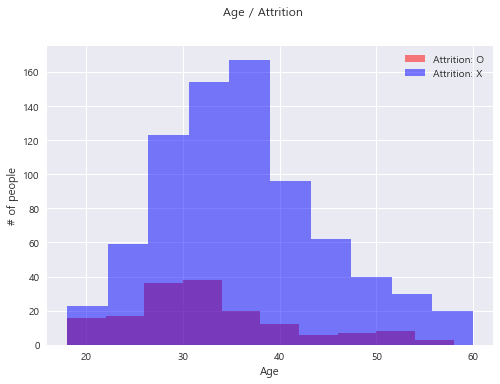

In [27]:
fig, ax = plt.subplots()

ax.hist(total_data[total_data["Attrition"]=='Yes']["Age"],color="red",alpha=0.5, label="Attrition: O")
ax.hist(total_data[total_data["Attrition"]=='No']["Age"], color="blue",alpha=0.5, label="Attrition: X")

ax.set_xlabel("Age")
ax.set_ylabel("# of people")

fig.suptitle("Age / Attrition")

ax.legend()

#### Attrition이 yes/no 인 데이터 중에 각 category에 따른 퇴사자 분포 확인

In [28]:
import random

def bar_plot_yes(data, category):
    tmp_data = data[data["Attrition"]=='Yes']
    attri_count = tmp_data.groupby([category]).count()

    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    plt.suptitle(f'{category}별로 attriton 결과')
    plt.bar([name for name in total_data[category].unique()],attri_count['Attrition'],color=color)
    plt.show()

def bar_plot_no(data, category):
    tmp_data = data[data["Attrition"]=='No']
    attri_count = tmp_data.groupby([category]).count()

    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    plt.suptitle(f'{category}별로 attriton 결과')
    plt.bar([name for name in total_data[category].unique()],attri_count['Attrition'],color=color)
    plt.show()

In [47]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

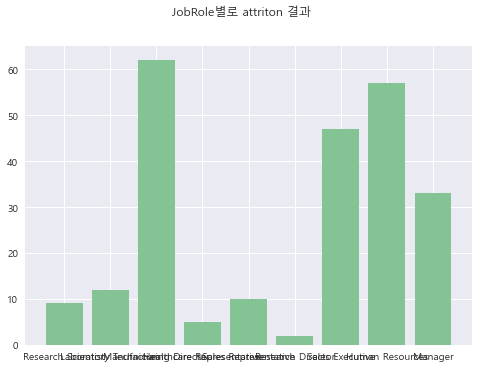

In [43]:
### JobRole은 원인 모르는 에러가 나서 따로 plot
tmp_data = data[data["Attrition"]=='Yes']
attri_count = tmp_data.groupby(['JobRole']).count()

r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)

plt.suptitle('JobRole별로 attriton 결과')
plt.bar([name for name in total_data['JobRole'].unique()],attri_count['Attrition'],color=color)
plt.show()

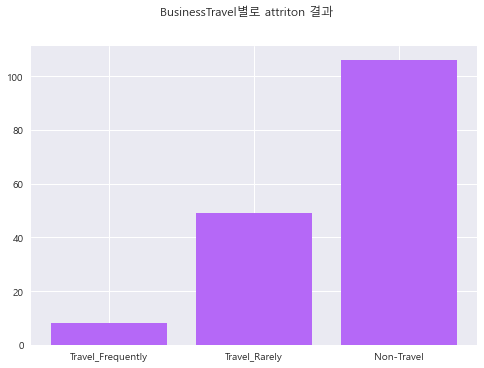

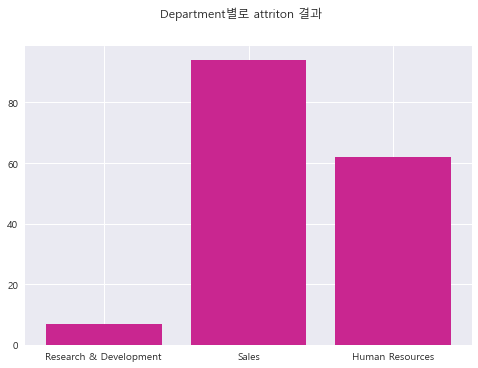

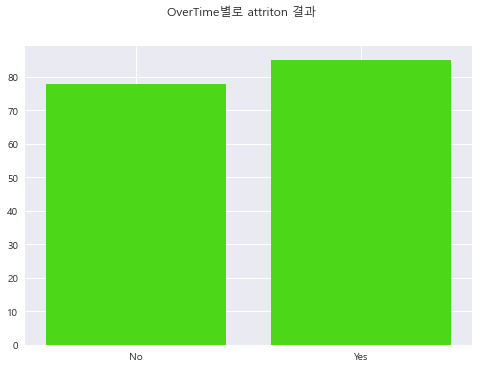

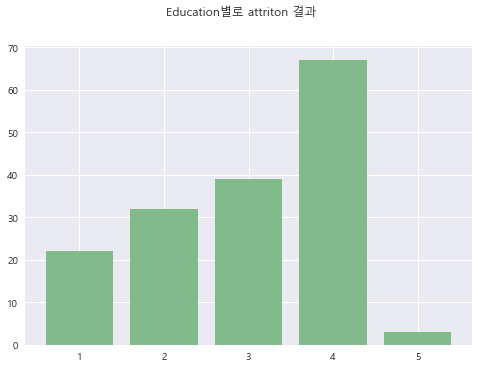

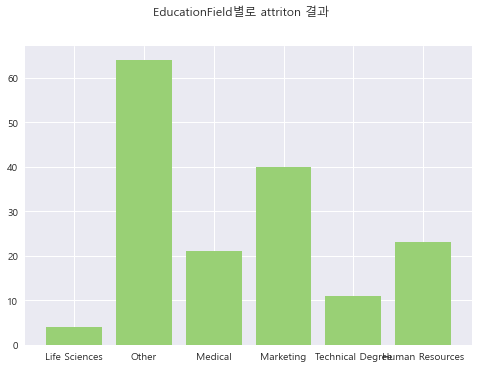

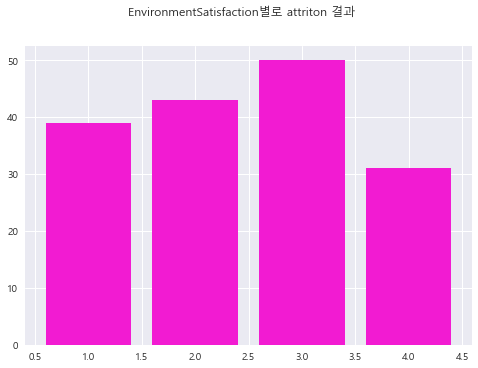

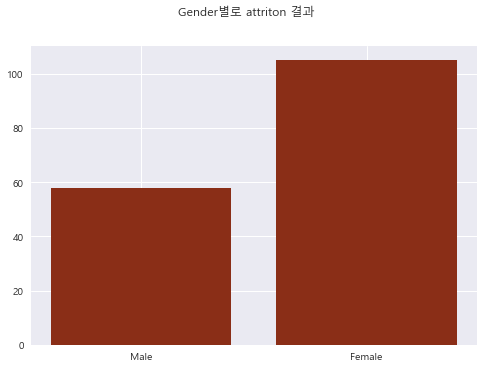

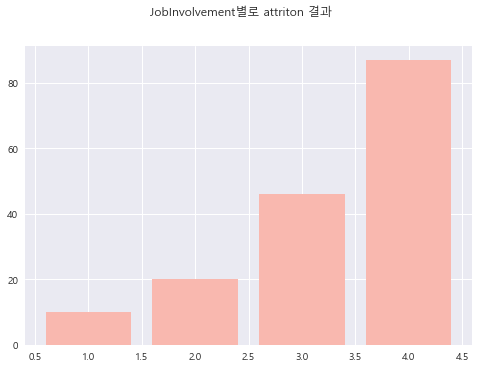

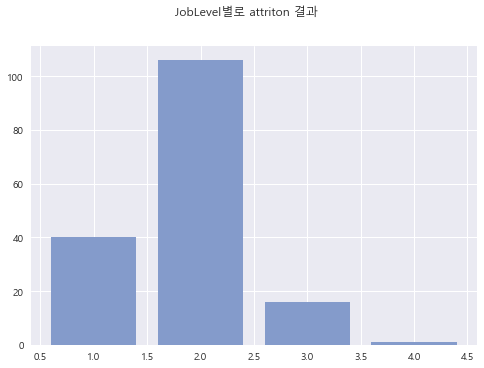

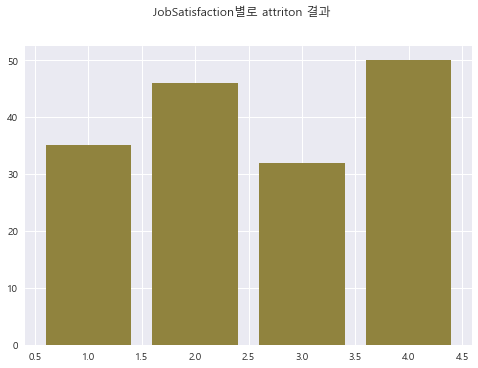

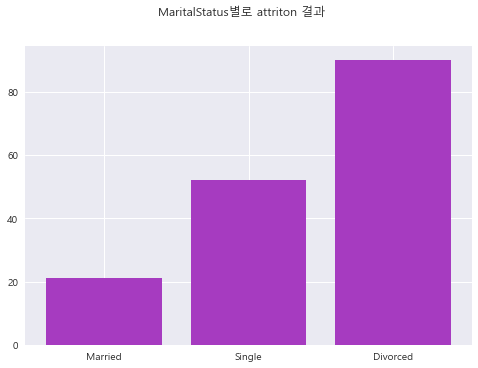

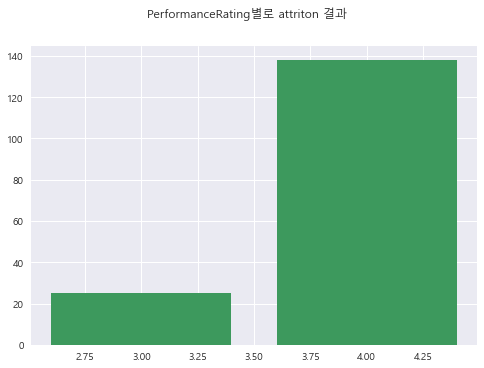

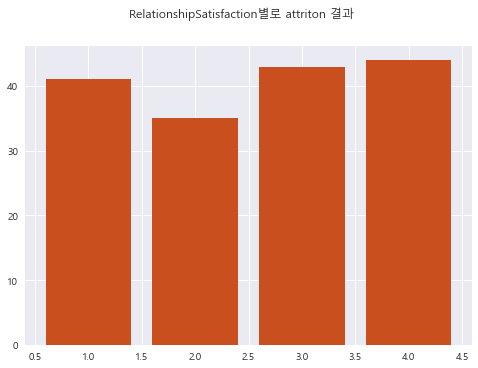

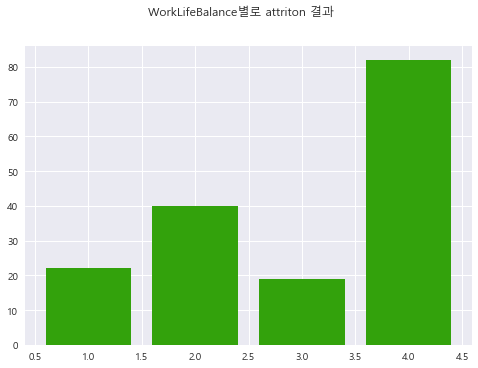

In [30]:
# yes
tmp = category_data.drop(['Attrition','JobRole'],axis=1)
for category_ in tmp.columns:
    bar_plot_yes(total_data,category_)

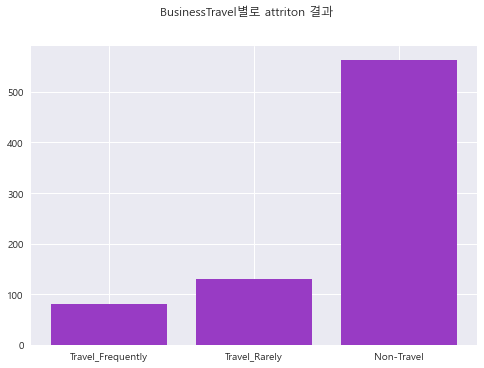

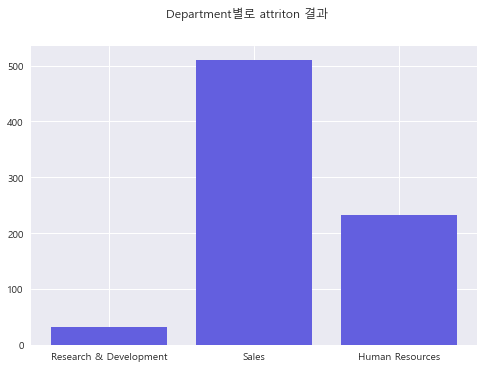

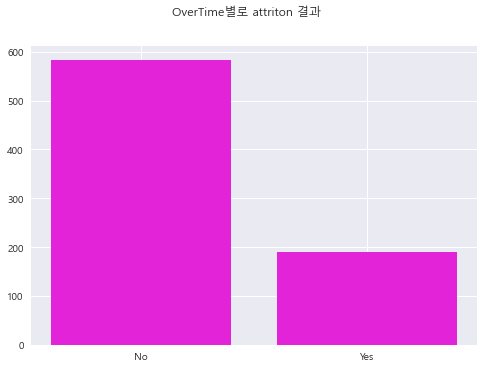

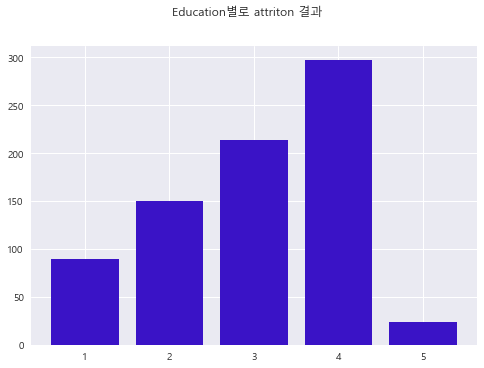

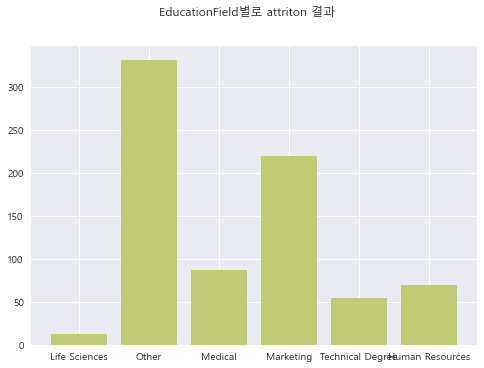

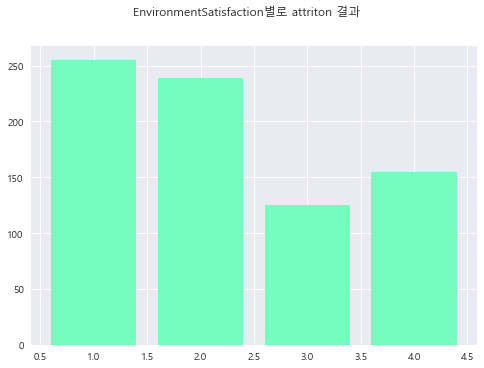

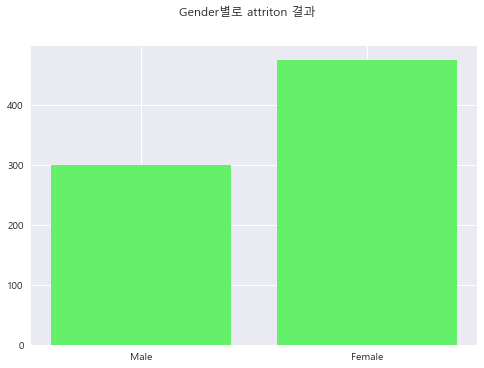

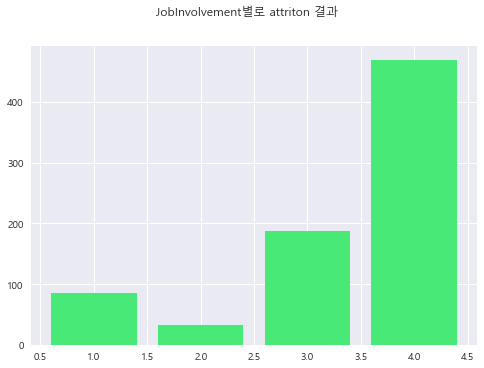

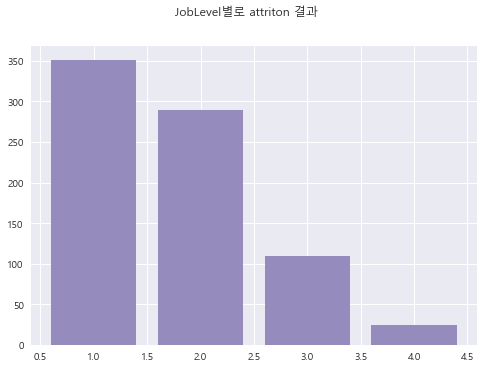

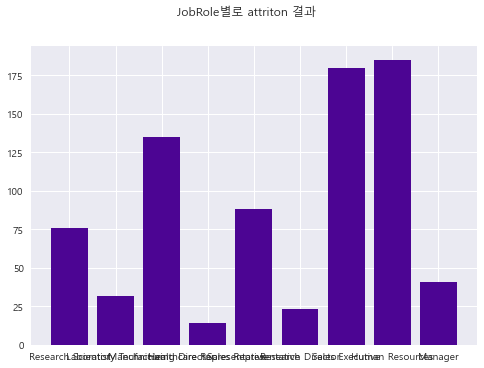

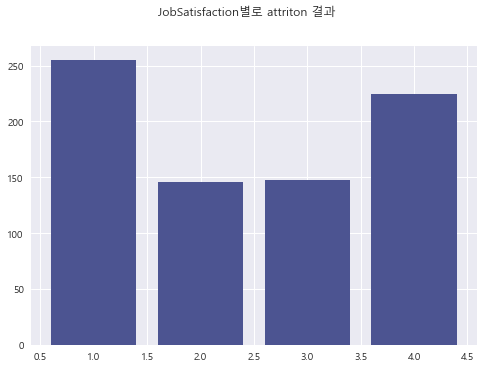

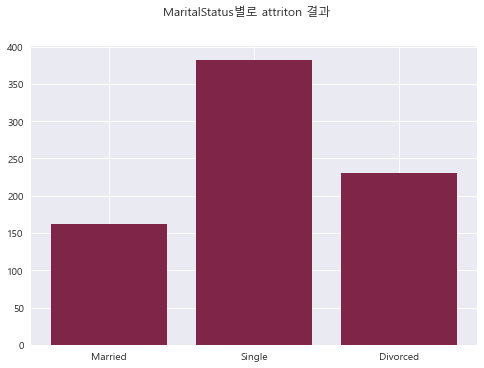

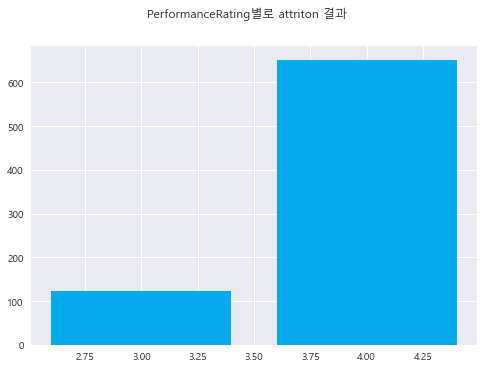

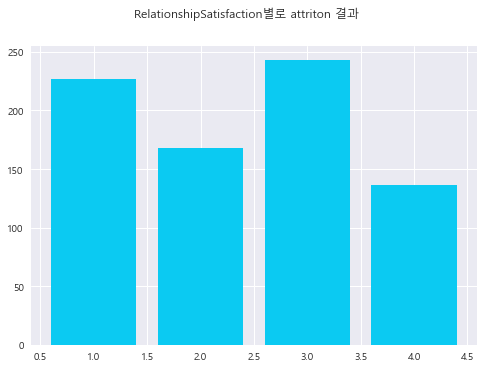

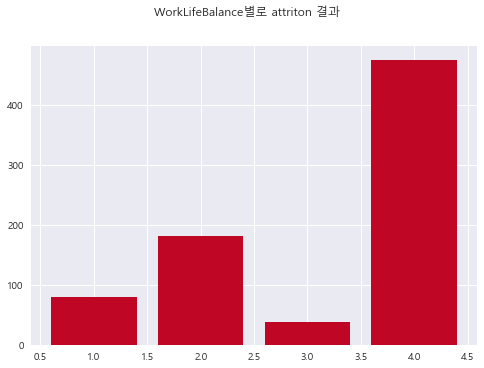

In [44]:
# no
tmp = category_data.drop('Attrition',axis=1)
for category_ in tmp.columns:
    bar_plot_no(total_data,category_)

In [45]:
import pandas_profiling

pandas_pf_report = data.profile_report()
pandas_pf_report.to_file('pandas_report.html')

In [46]:
import sweetviz as sv

data_report = sv.analyze(data)
data_report.show_html('report.html')


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 분석 결과

### Data Loading
모든 column에 1470개의 데이터가 있기 때문에, 결측치 x

Numerical Feature를 갖은 data와 Categorical Feature를 갖은 data로 나눠서 분석 시작
EmployeeNumber 직원ID가 고유값이기 때문에 각 두개의 data의 index로 설정

#### Data Outlier Detection (numerical data)
Box Plot기반인 Interquartile Range (IQR) Q3-Q1을 활용해 이상치 제거
-> 이론적인 이상치제거 방법론이기 때문에 한계점 존재
이상치로 분류된 값의 해당 index(행)을 제거

Skewness와 Kurtosis를 활용하여 data transformation 적용여부 확인
-> Skewness는 절댓값이 1이상인 값들에 대하여 log transformation적용 
(skewnewss 절댓값이 1이상이면 한 곳에 상당히 치우쳐져있다)
: MonthlyIncome과 YearsSinceLastPromotion만 log transformation 적용

-> Kurtosis는 3이상인 값들에 대하여 transformation적용
: 3이상인 feature들이 없으므로 전처리x

EmployeeCount와 StandardHours는 항상 고정된 값을 갖고 있으므로 삭제

Heatmap을 통해 Correlation을 확인

Age, MonthlyIncome: 0.36   (약)
Age, NumCompaniesWorked: 0.32   (약)
Age, TotalWorkingYears: 0.58   (중)

MonthlyIncome, TotalWorkingYears: 0.62   (중)
MonthlyIncome, YearsAtCompany: 0.37   (약)
MonthlyIncome, YearsInCurrentRole: 0.34   (약)
MonthlyIncome, YearsWithCurrManager: 0.31   (약)

NumCompaniesWorked, TotalWorkingYears: 0.33   (약)

TotalWorkingYears, YearsAtCompany: 0.44   (중)
TotalWorkingYears, YearsInCurrentRole: 0.39   (약)
TotalWorkingYears, YearsWithCurrManager: 0.37   (약)

YearsAtCompany, YearsInCurrentRole: 0.86   (강)
YearsAtCompany, YearsSinceLastPromotion: 0.44   (중)
YearsAtCompany, YearsWithCurrM: 0.85   (강)

YearsInCurrentRole, YearsSinceLastPromotion: 0.45   (중)
YearsInCurrentRole, YearsWithCurrM: 0.73   (강)

YearsSinceLastPromotion, YearsWithCurrM: 0.41   (중)

YearsAtCompany, YearsInCurrentRole,YearsWithCurrM 변수 3개가 서로 상관관계가 높기 때문에 하나의 변수 'YearsCompany'로 합침 -> 3개의 평균값으로 대표값 설정

#### Data Outlier Detection (categorical data)
Categorical 변수 내에서는 주어진 라벨 외의 다른 값은 없다. (정상)
Over18 변수는 전체가 Y값이기 때문에 분석에 필요 없음 -> 삭제

histogram을 확인한 결과
Attriton을 종속 변수로 취했을 때, Attrition: 'No'가 상대적으로 'Yes'보다 많이 있어 imbalanced data를 이루고 있음
30~40대 연령층의 사람들이 제일 많이 분포해있음

### Attrition을 'yes'인 경우와 'no'인 경우 두가지에 대한 bar plot 확인
#### 'Yes'
-BusinessTravel: Non-travel이 퇴사 비중이 제일 높고 travel_frequency가 제일 낮다. 여행을 가지 않을 수록 퇴사 빈도가 늘어남

-Department: 연구개발쪽에 비해 영업쪽이 퇴사 비중이 앞도적으로 높다. 

-OverTime: 초과근무에 있어서는 뚜렷한 특징이 없음

-Education: '석사'가 퇴사비중이 제일 높고 '박사'가 제일 낮다

-EducationalField: 생명과학쪽이 다른 분야에 비해 상대적으로 퇴사를 안하는 비중이 제일 낮다.

-EnvironmentSatisfaction: 뚜렷한 특징이 없다.

-Gender: 여성이 남성보다 퇴사 비중이 높다

-JobInvolvement: 업무 참여도가 높을수록 퇴사비중이 큰 경향을 보임

-JobLevel: 책임감이 강할수록 퇴사비중이 낮은 경향 보임

-JobSatisfaction: 뚜렷한 특징이 없다.

-MaritalStatus: 결혼 < 싱글 < 이혼 순으로 퇴사비중 높다.

-PerformanceRating: 업무성과가 높을 수록 퇴사비중 높다 (전처리 잘못되있음 의심)

-RelationshipSatisfaction: 뚜렷한특징이 없다

-WorkLifeBalance: 워라벨이 좋을수록 퇴사비중 높다.

#### 'No'
-BusinessTravel: Non-travel이 퇴사를 안하는 비중이 제일 높고 travel_frequency가 제일 낮다. 여행을 가지 않을 수록 퇴사를 안하는 빈도가 늘어남

-Department: 연구개발쪽에 비해 영업쪽이 퇴사를 안하는 비중이 앞도적으로 높다.

-OverTime: 초과근무를 안할수록 퇴사를 안하는 비중이 높다

-Education: '석사'가 퇴사를 안하는 비중이 제일 높고 '박사'가 제일 낮다

-EducationalField: 생명과학쪽이 다른 분야에 비해 상대적으로 퇴사를 안하는 비중이 제일 낮다.

-EnvironmentSatisfaction: 뚜렷한 특징이 없다.

-Gender: 여성이 남성보다 퇴사를 안하는 비중이 높다

-JobInvolvement: 업무 참여도가 높을수록 퇴사를 안하는 비중이 큰 경향을 보임

-JobLevel: 책임감이 강할수록 퇴사를 안하는 비중이 낮은 경향 보임

-JobSatisfaction: 뚜렷한 특징이 없다.

-MaritalStatus: 결혼 < 이혼 < 싱글 순으로 퇴사를 안하는 비중 높다.

-PerformanceRating: 업무성과가 높을 수록 퇴사를 안하는 비중 높다 (전처리 잘못되있음 의심)

-RelationshipSatisfaction: 뚜렷한특징이 없다

-WorkLifeBalance: 워라벨이 좋을수록 퇴사를 안하는 비중 높다.

#### Insight
target variable을 'attrition'으로 두고 categorical variable에 대한 1:1 플랏을 확인했을 때,
-> 'Yes'와 'No'의 결과가 전반적으로 비슷하게 나왔는데, imbalanced 데이터의 상황에서 'yes'와 'no'로 나누어서 결과 해석이 유의미하지 않다고 생각
-> 데이터의 갯수가 부족한 상황에 이상치 제거 및 전처리를 통해 데이터의 상당수가 손실되어서 설상가상으로 표본이 의미하는 바가 크게 없음


## 추가적으로
pandas_profiling와 sweetviz 자동 EDA tool을 활용하면 자세하게 원하는 방향으로 분석은 못하지만, 대략적으로 빠른 시간안에 검토 가능